In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.listdir(".")

['bindMountResults.csv',
 '.git',
 'localResults.csv',
 'volumeResults.csv',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'stream',
 'processResults.py']

In [14]:
df_local = pd.read_csv("localResults.csv", index_col=0)
df_volume = pd.read_csv("volumeResults.csv", index_col=0)
df_bind = pd.read_csv("bindMountResults.csv", index_col=0)

In [15]:
df_local.head()

,Bandwidth,AvgTime,Type,NumElements,Processes
0,18219.7,0.088092,Copy,100000000,1
1,17978.7,0.089118,Scale,100000000,1
2,20479.8,0.117371,Add,100000000,1
3,20269.8,0.118549,Triad,100000000,1
4,18828.5,0.085184,Copy,100000000,2


In [16]:
set(list(df_local["NumElements"]))

{1000000,
 2000000,
 5000000,
 10000000,
 25000000,
 50000000,
 100000000,
 250000000,
 500000000}

--------------------------------------------------------------------
Copy--1000000 elements


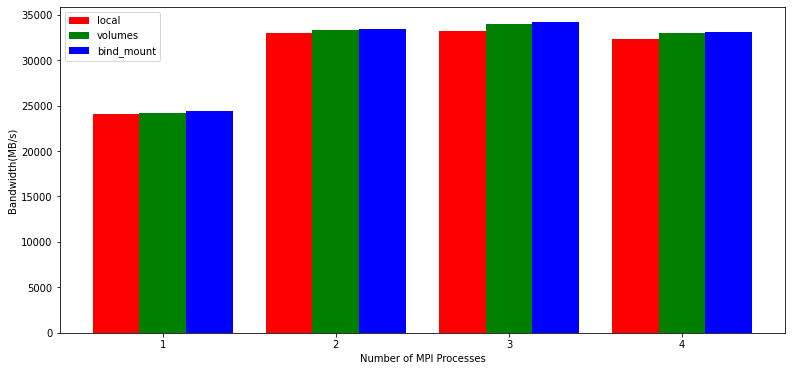

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--2000000 elements


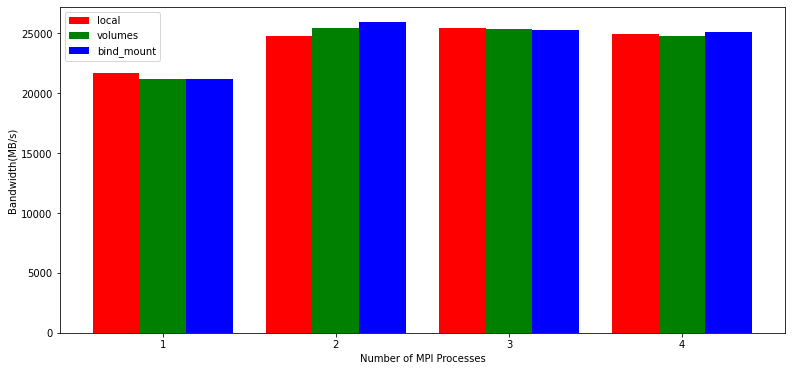

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--5000000 elements


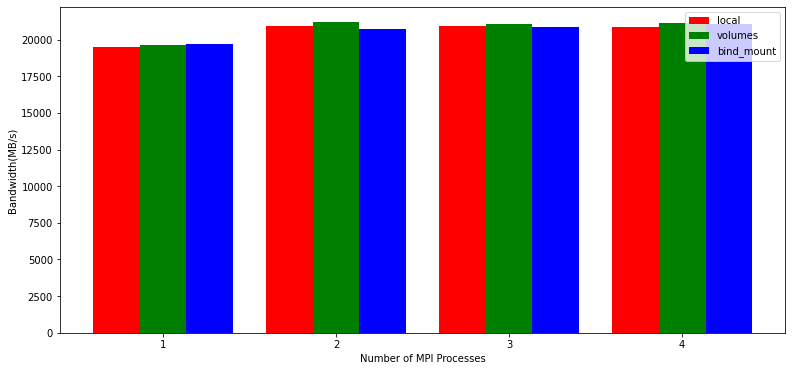

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--10000000 elements


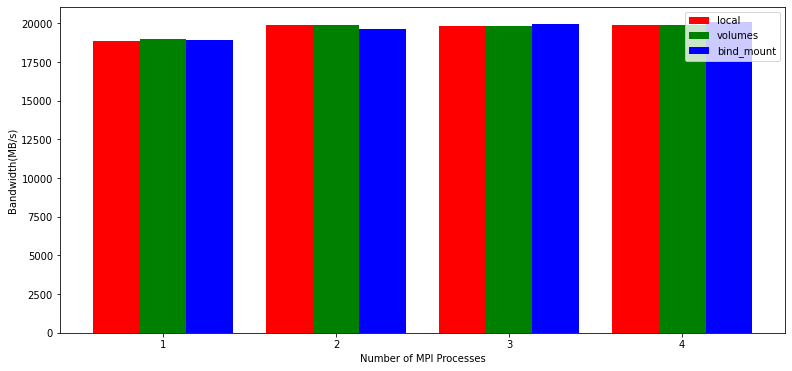

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--25000000 elements


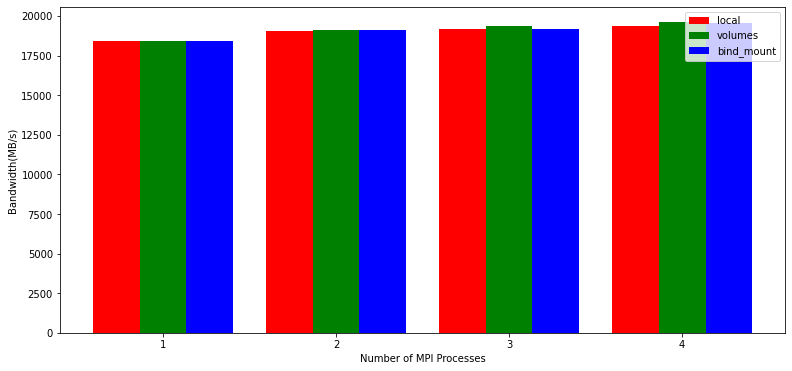

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--50000000 elements


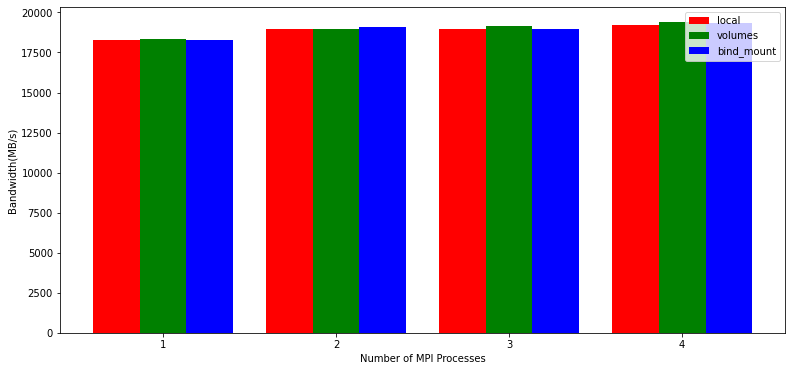

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--100000000 elements


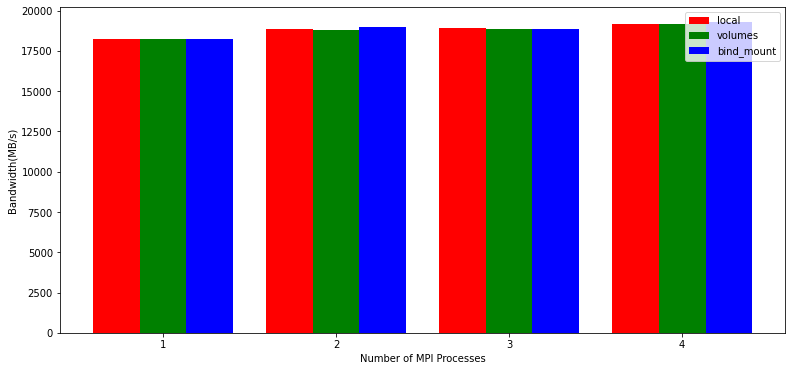

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--250000000 elements


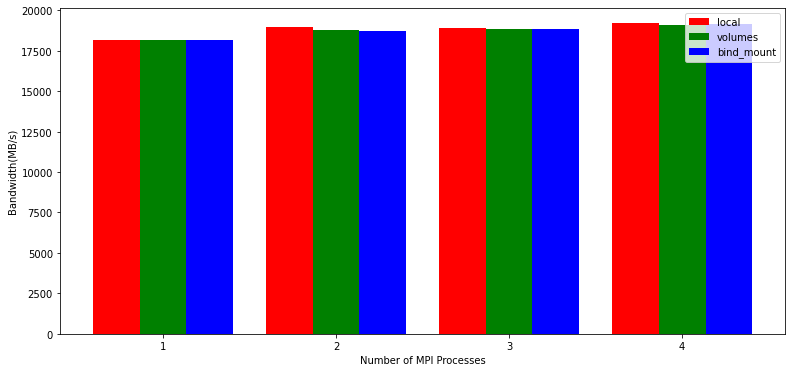

--------------------------------------------------------------------
--------------------------------------------------------------------
Copy--500000000 elements


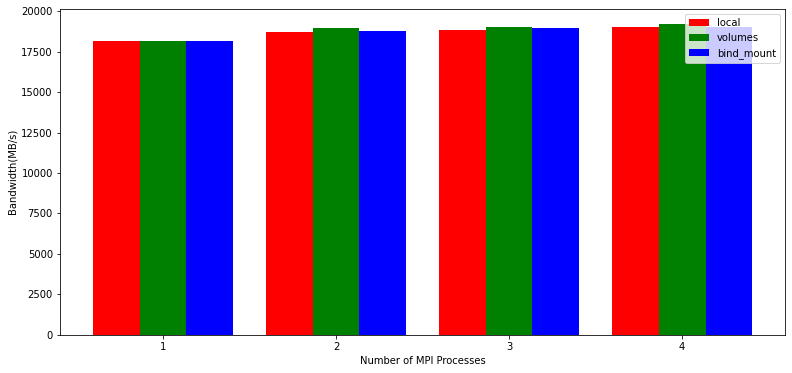

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--1000000 elements


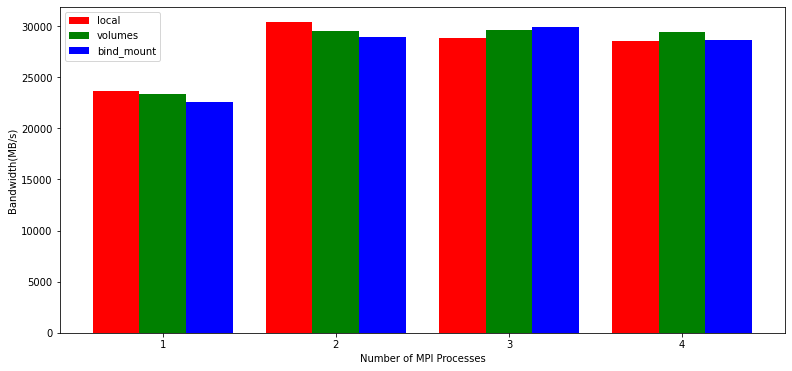

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--2000000 elements


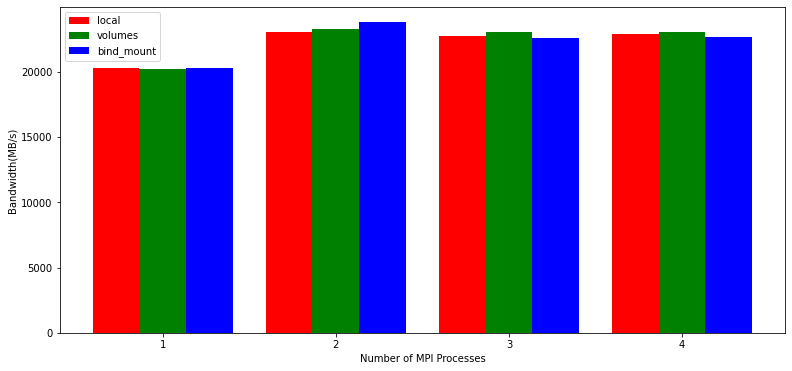

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--5000000 elements


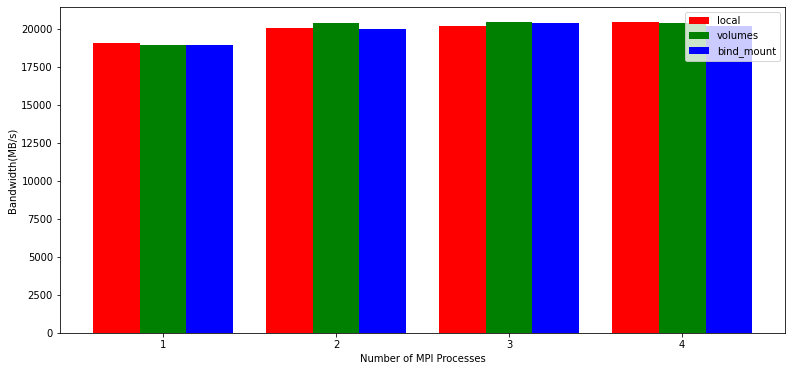

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--10000000 elements


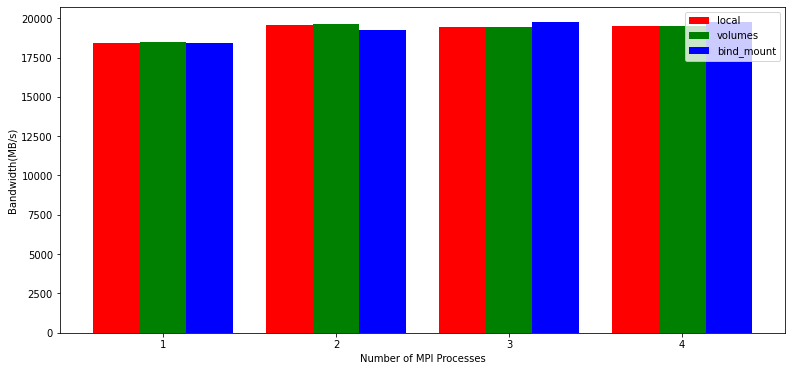

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--25000000 elements


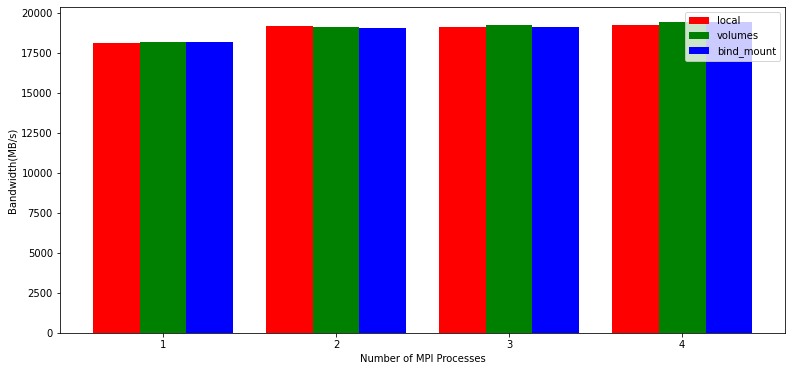

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--50000000 elements


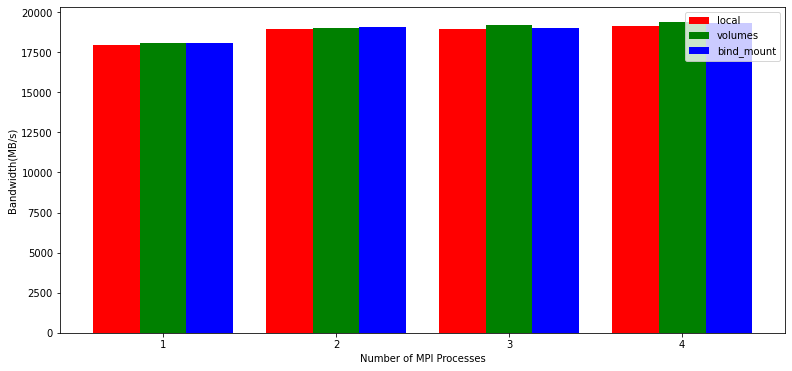

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--100000000 elements


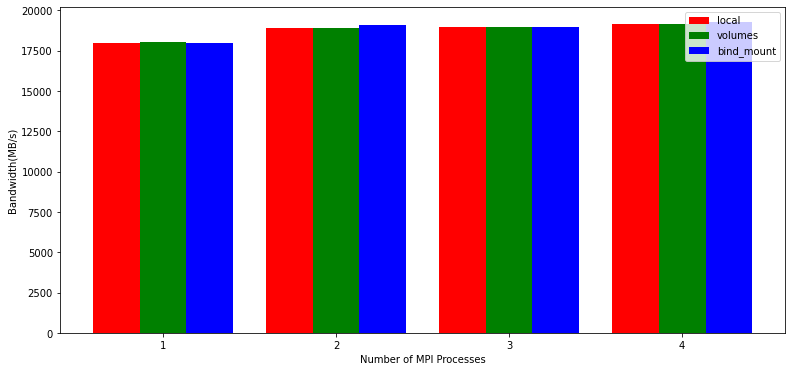

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--250000000 elements


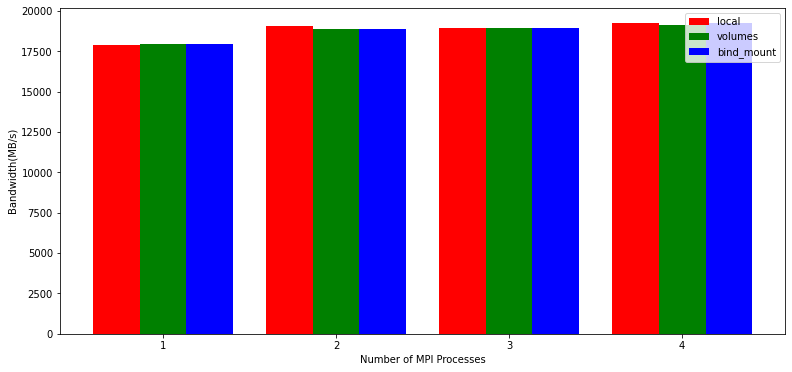

--------------------------------------------------------------------
--------------------------------------------------------------------
Scale--500000000 elements


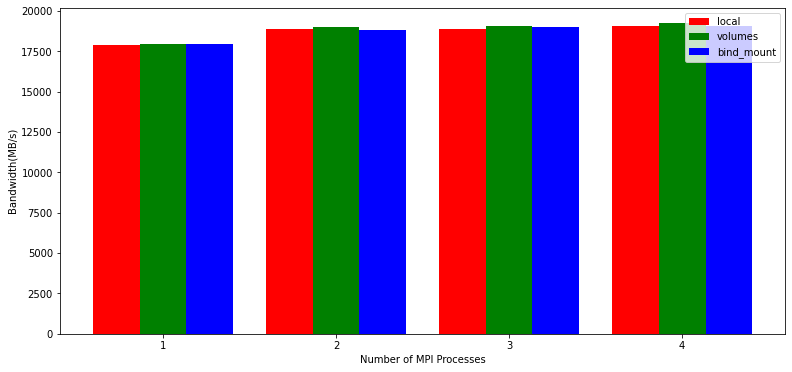

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--1000000 elements


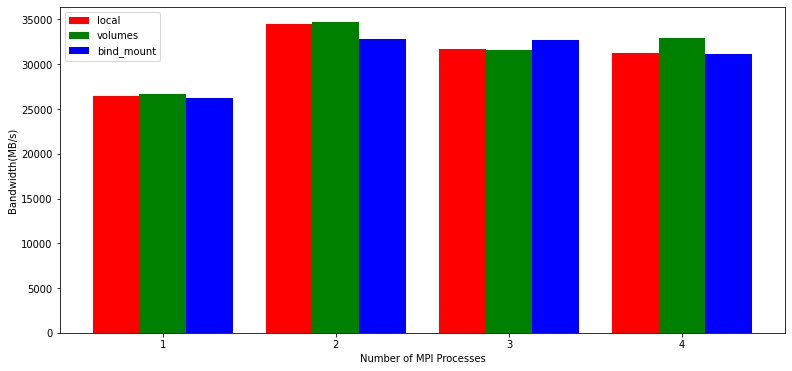

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--2000000 elements


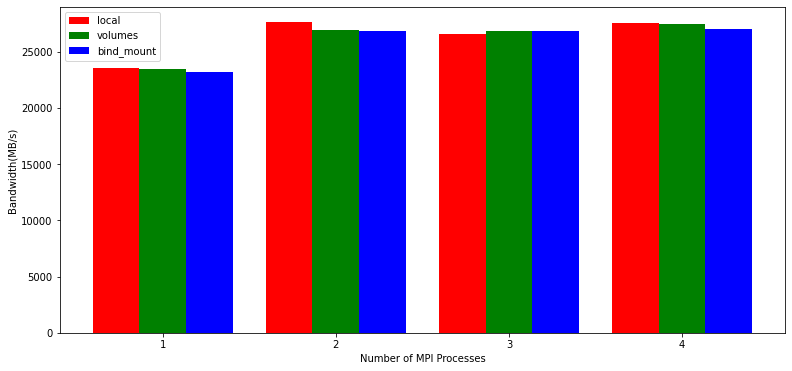

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--5000000 elements


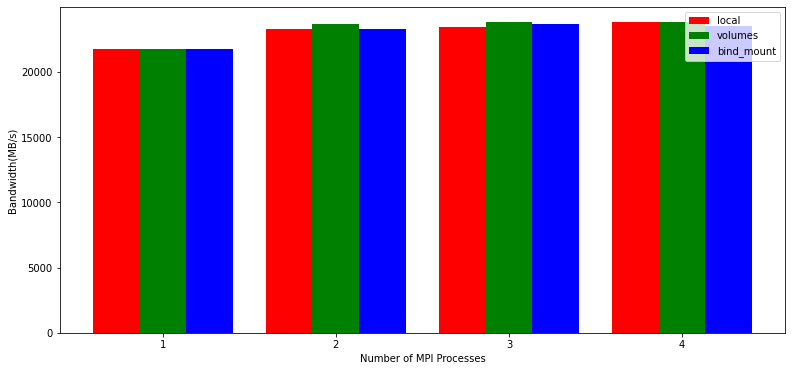

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--10000000 elements


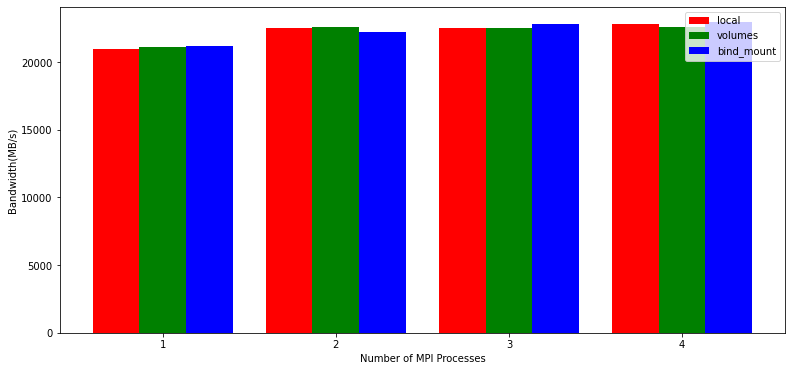

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--25000000 elements


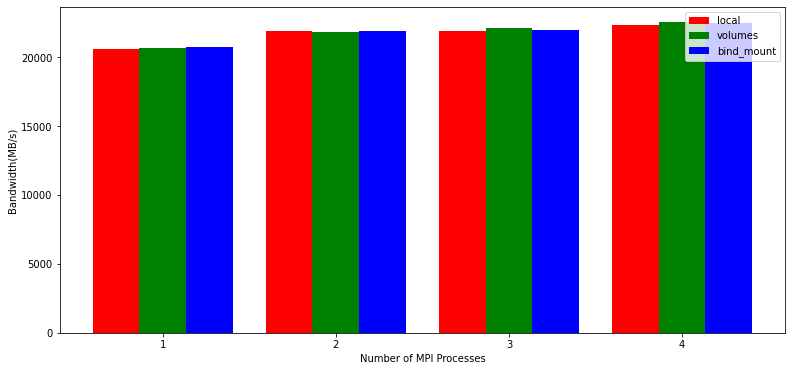

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--50000000 elements


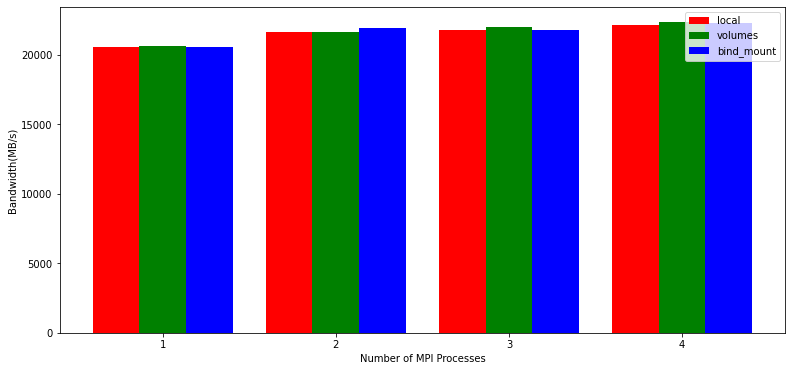

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--100000000 elements


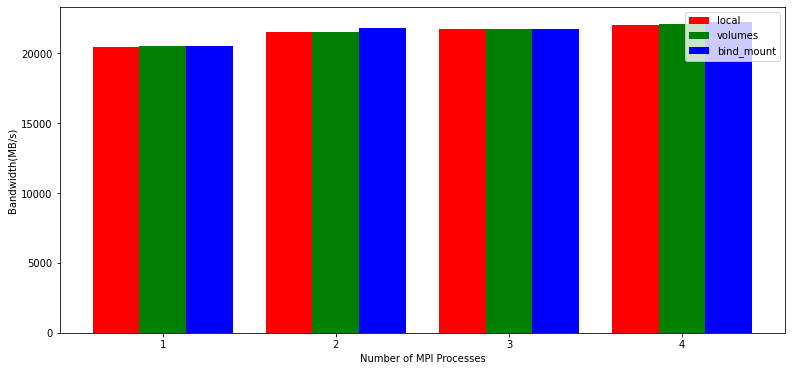

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--250000000 elements


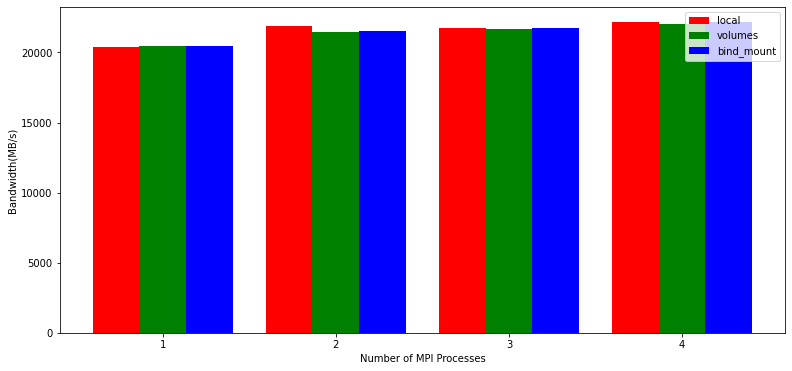

--------------------------------------------------------------------
--------------------------------------------------------------------
Add--500000000 elements


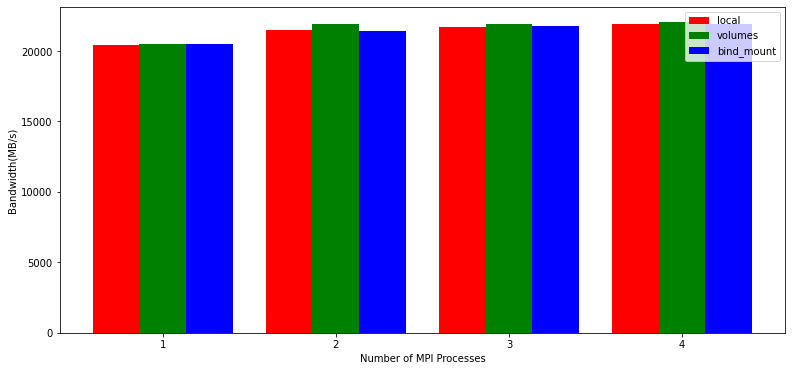

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--1000000 elements


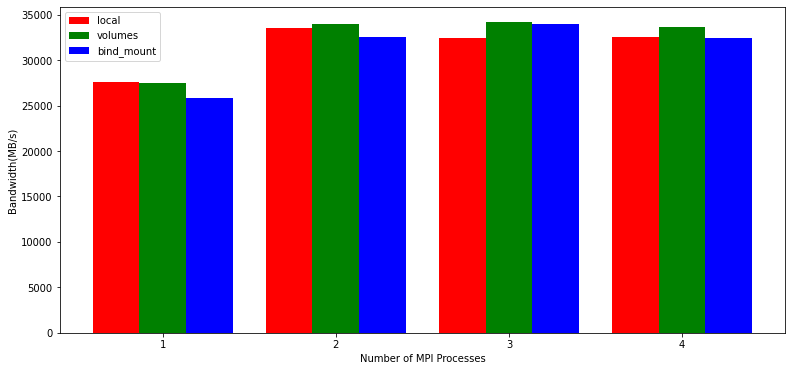

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--2000000 elements


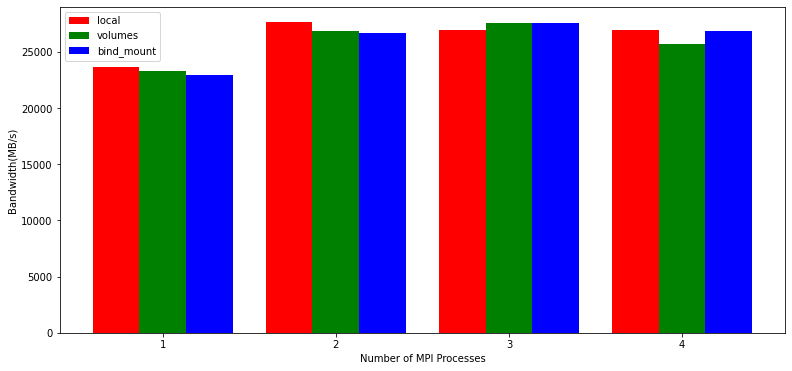

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--5000000 elements


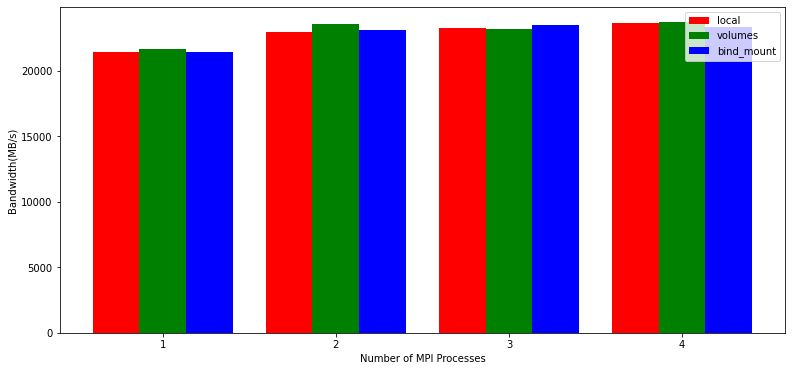

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--10000000 elements


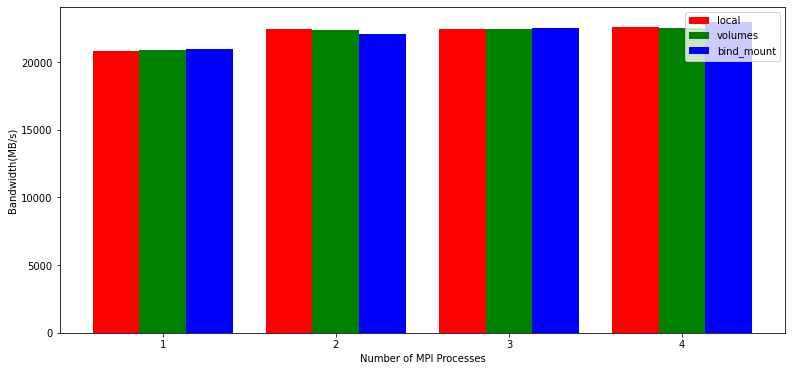

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--25000000 elements


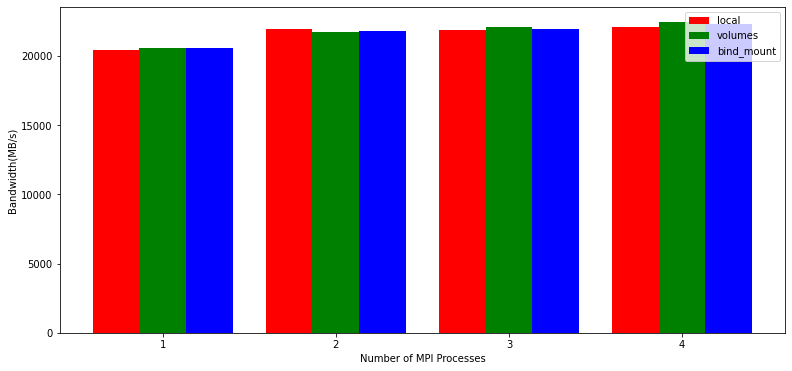

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--50000000 elements


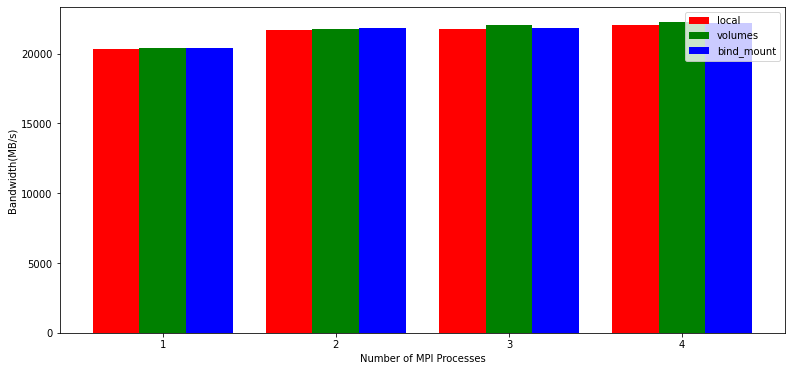

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--100000000 elements


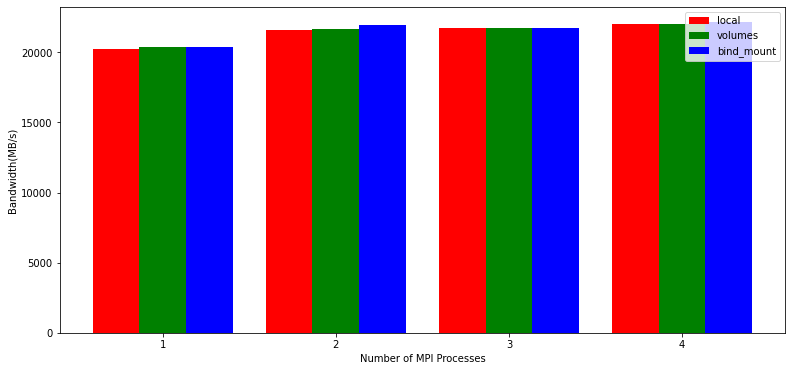

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--250000000 elements


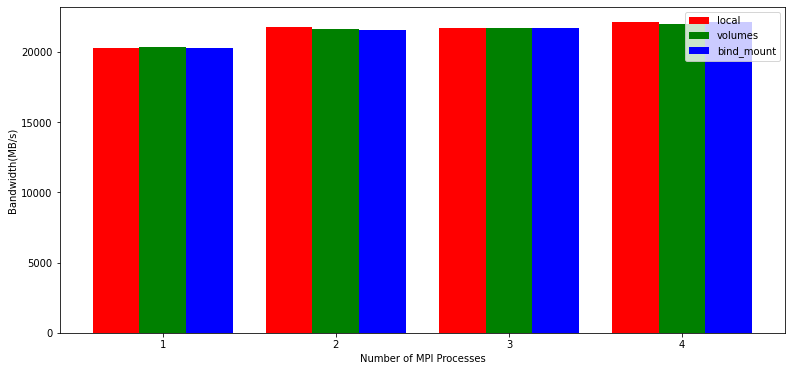

--------------------------------------------------------------------
--------------------------------------------------------------------
Triad--500000000 elements


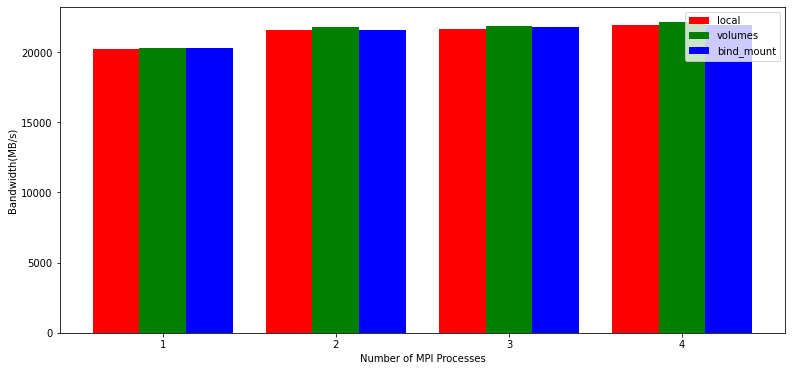

--------------------------------------------------------------------


In [17]:
read_write = ["Copy", "Scale", "Add", "Triad"]
num_proc = [1,2,3,4]
num_part = [1000000,2000000,5000000,10000000,25000000,50000000,100000000,250000000,500000000]
width = 0.27
ind = np.arange(4)


for i in read_write:
    df1 = df_local[df_local["Type"]==i]
    df2 = df_volume[df_volume["Type"]==i]
    df3 = df_bind[df_bind["Type"]==i]
    
    for j in num_part:
        df11 = df1[df1["NumElements"]==j]
        df22 = df2[df2["NumElements"]==j]
        df33 = df3[df3["NumElements"]==j]
        print("--------------------------------------------------------------------")
        print(i + "--" + str(j) + " elements")
        fig = plt.figure(figsize=(13, 6))
        ax = fig.add_subplot(111)
        xvals = []
        yvals = []
        zvals = []
        for k in num_proc:
            xvals.append(float(df11[df11["Processes"]==k]["Bandwidth"]))
            yvals.append(float(df22[df22["Processes"]==k]["Bandwidth"]))
            zvals.append(float(df33[df33["Processes"]==k]["Bandwidth"]))
        
        rects1 = ax.bar(ind, xvals, width, color='r')
        rects2 = ax.bar([i+width for i in ind], yvals, width, color='g')
        rects3 = ax.bar([i+width*2 for i in ind], zvals, width, color='b')
        ax.set_xlabel("Number of MPI Processes")
        ax.set_ylabel("Bandwidth(MB/s)")
        ax.set_xticks([i+width for i in ind])
        ax.set_xticklabels((1,2,3,4))
        ax.legend((rects1[0], rects2[0], rects3[0]), ("local", "volumes", "bind_mount"))
        #autolabel(rects1)
        #autolabel(rects2)
        #autolabel(rects3)

        plt.show()
        print("--------------------------------------------------------------------")